## Homework 7
Imports..

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import collections
from mpl_toolkits.mplot3d import Axes3D
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix

### Exercise 3

In the diagram bellow, horizontal lines are the probabilities $p(x|\omega_1)P(\omega_1)$ (red), $p(x|\omega_2)P(\omega_2)$ (green), $p(x|\omega_3)P(\omega_3)$ (blue).

The blocks under the lines are the decision regions of the classes.

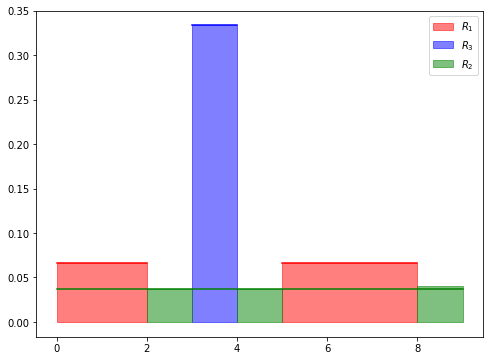

In [2]:
fig, ax = plt.subplots(figsize = ((8,6)))
#w1
ax.plot(range(3),(1/15, 1/15, 1/15), c = "red")
ax.fill_between(range(3), 0, 1/15, color = "red", alpha = 0.5, label = "$R_1$")
ax.plot(range(5,9,1),(1/15, 1/15, 1/15, 1/15), c = "red")
ax.fill_between(range(5,9,1), 0, 1/15, color = "red", alpha = 0.5)
#w3
ax.plot(range(3,5),(1/3,1/3), c = "blue")
ax.fill_between(range(3,5), 0, 1/3, color = "blue", alpha = 0.5, label = "$R_3$")
#w2
ax.plot(range(0,10),(1/27,1/27,1/27,1/27,1/27,1/27,1/27,1/27,1/27,1/27), c = "green")
ax.fill_between(range(2,4), 0, 1/27, color = "green", alpha = 0.5, label = "$R_2$")
ax.fill_between(range(4,6), 0, 1/27, color = "green", alpha = 0.5)
ax.fill_between(range(8, 10), 0, 1/25, color = "green", alpha = 0.5)

plt.legend() 

### Exercise 4

In [3]:
training_set = sio.loadmat('Training_set.mat')
train_x = training_set['train_x']
train_y= training_set['train_y']

test_set = sio.loadmat('Test_set.mat')
test_x = test_set['test_x']
test_y = test_set['test_y']

(i) Parametric approach

First, we will compute the probabilities $P(\omega_1)$, $P(\omega_2)$, $P(\omega_3)$ by dividing the times each class occured in the dataset by the total number of elements in the data set:

$P(\omega_1)$ = 0.5

$P(\omega_2)$ = 0.25

$P(\omega_3)$ = 0.25

In [4]:
counts = collections.Counter(train_y.reshape(4000))
N1, N2, N3 = counts.values()

In [5]:
P1 = N1/len(train_y)
P2 = N2/len(train_y)
P3 = N3/len(train_y)

P1, P2, P3

(0.5, 0.25, 0.25)

Let' s take a look on te shape of each class:

* Class $\omega_1$: Gaussian Mixture model with 2 components is needed, because points come from 2 Gaussian distributions.

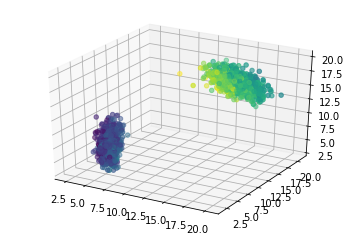

In [6]:
n = train_x.shape[0]
omega1 = np.zeros((0,4))

for i in range (n):
    if train_y[i] == 1:
        omega1 = np.append(omega1, [train_x[i]], axis = 0)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')        
ax.scatter(omega1[:,0], omega1[:,1], omega1[:,2], c = omega1[:, 3])

In [7]:
clf1 = GaussianMixture(n_components = 2, covariance_type = 'full')
clf1.fit(omega1)

pdf1 = np.exp(clf1.score_samples(test_x))
px_w1 = pdf1*P1

* Class $\omega_2$: Gaussian Mixture model with one component.

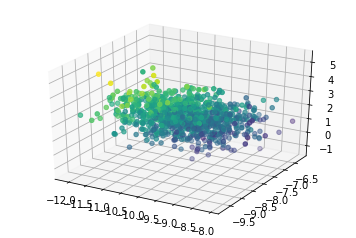

In [8]:
omega2 = np.zeros((0,4))

for i in range (n):
    if train_y[i] == 2:
        omega2 = np.append(omega2, [train_x[i]], axis = 0)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')        
ax.scatter(omega2[:,0], omega2[:,1], omega2[:,2], c = omega2[:, 3])

In [9]:
clf2 = GaussianMixture(n_components = 1, covariance_type = 'full')
clf2.fit(omega2)

pdf2 = np.exp(clf2.score_samples(test_x))
px_w2 = pdf2*P2

* Class $\omega_3$: Gaussian Mixture model with one component.

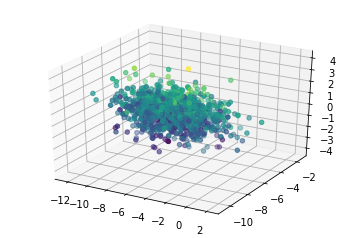

In [10]:
omega3 = np.zeros((0,4))

for i in range (n):
    if train_y[i] == 3:
        omega3 = np.append(omega3, [train_x[i]], axis = 0)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')        
ax.scatter(omega3[:,0], omega3[:,1], omega3[:,2], c = omega3[:, 3])

In [11]:
clf3 = GaussianMixture(n_components = 1, covariance_type = 'full')
clf3.fit(omega3)

pdf3 = np.exp(clf3.score_samples(test_x))
px_w3 = pdf3*P3

Now that we have the probabilities $P(x|\omega_i), i =1,2,3$ we can check our predictions. 

In [12]:
#Create Btest_y
Btest_y = []

#classify all from test_x
for i in range(test_x.shape[0]):
    if px_w1[i] > px_w2[i] and px_w1[i] > px_w3[i]:
        Btest_y  = np.append(Btest_y, 1)
    elif px_w2[i] > px_w1[i] and px_w2[i] > px_w3[i]:
        Btest_y  = np.append(Btest_y, 2)
    elif px_w3[i] > px_w1[i] and px_w3[i] > px_w2[i]:
         Btest_y  = np.append(Btest_y, 3)

In [13]:
error = 0
for i in range(len(Btest_y)):
    if Btest_y[i] != test_y[i]:
        error += 1
print("Error: ",error/len(Btest_y))

Error:  0.012


Finally, let' s build the confusion matrix:

In [17]:
confusion_matrix(test_y, Btest_y)

array([[2000,    0,    0],
       [   0,  986,   14],
       [   0,   34,  966]], dtype=int64)